# Examples for DA fitting (updated for tlossmin)

This notebook gives an overview of python functions implemented for the analysis of dynamic aperture data from SixDesk.

## Initialize

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sixdesk.da as da
import time

In [359]:
import math
from scipy.integrate import nquad

In [363]:
def plot_comparison_data_filtered(name,seed):
    fig = plt.figure(figsize=(6,4))


    b = da.davst(name,emit=2.5)
    b.fit(seed,gradient=0.8)
    exda = b.extrapolate(11245*60*30)

    d,bb,k,_,_,_ = b._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    daval =  da.davst_function(turns,d,bb,k)
    
    data = b.data[b.data['seed']==seed]
    plt.plot(data['tlossmin'],data['dawsimp'],'o',label='raw') 
    
    plt.plot(b.cleaned_data['tlossmin'],b.cleaned_data['dawsimp'],'o',label='filtered')
    plt.legend()
    plt.xlabel("tlossmin")
    plt.ylabel("DA")
    plt.show()

# Compare raw and filtered data 

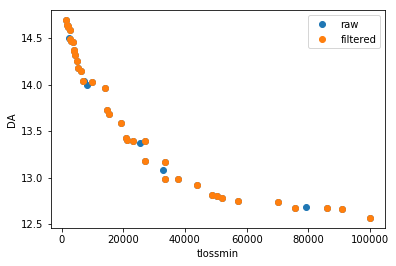

In [364]:
plot_comparison_data_filtered("/home/phermes/development/SixDeskDB/test5_step_2.0sigma.db",1)

## Show DA vs turns for all angles

In [381]:
dftot = pd.DataFrame()
for nturn in np.arange(200.,100000.,100):
    try:
        df = pd.read_csv('/home/phermes/development/SixDeskDB/turns_for_all_angles/file_turn_{0}_seed_3.dat'.format(nturn),
                        names=['angle','da','tloss'])
        df['nturn'] = np.ones(len(df))*nturn
        dftot = dftot.append(df)
    except FileNotFoundError:
        continue
    
nturn = np.unique(dftot['nturn'])[0]
aj = np.ones(len(dftot[dftot['nturn']==nturn])-2)
for position in [len(aj),0]:
    aj = np.insert(aj,position, 1.5)

### Using nturn

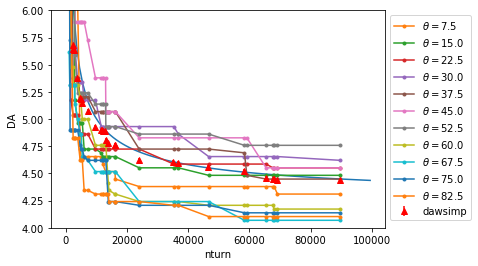

In [382]:
seed=3
b = da.davst('/home/phermes/development/SixDeskDB/test-0.db',emit=3.75)
b.fit(seed,gradient=0.8)
exda = b.extrapolate(11245*60*30)

d,bb,k,_,_,_ = b._fit_parameters_dict[seed]

turns =  np.arange(500,100000, 1000)
daval =  da.davst_function(turns,d,bb,k)
plt.errorbar(b.cleaned_data['nturn'],b.cleaned_data['dawsimp'],yerr=b.cleaned_data['dawsimperr'],fmt='r^')
plt.plot(turns,daval)

for angle in np.unique(dftot['angle']):
    plt.plot(dftot[dftot['angle']==angle]['nturn'], dftot[dftot['angle']==angle]['da'],'.-',
             label=r'$\theta=${}'.format(angle))
    
plt.xlabel("nturn")
plt.ylabel("DA")
plt.ylim(4,6)
plt.legend(bbox_to_anchor=[1.0,1.0])
plt.show()

### Using tloss

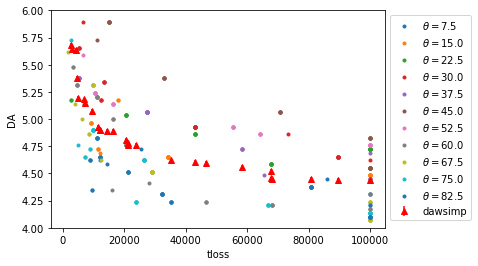

In [383]:
for angle in np.unique(dftot['angle']):
    plt.plot(dftot[dftot['angle']==angle]['tloss'], dftot[dftot['angle']==angle]['da'],'.',
            label=r"$\theta=${0}".format(angle))
    

plt.errorbar(b.cleaned_data['tlossmin'],b.cleaned_data['dawsimp'],yerr=b.cleaned_data['dawsimperr'],fmt='r^')
plt.xlabel("tloss")
plt.ylabel("DA")
plt.ylim(4,6)
plt.legend(bbox_to_anchor=[1.0,1.0])
plt.show()

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


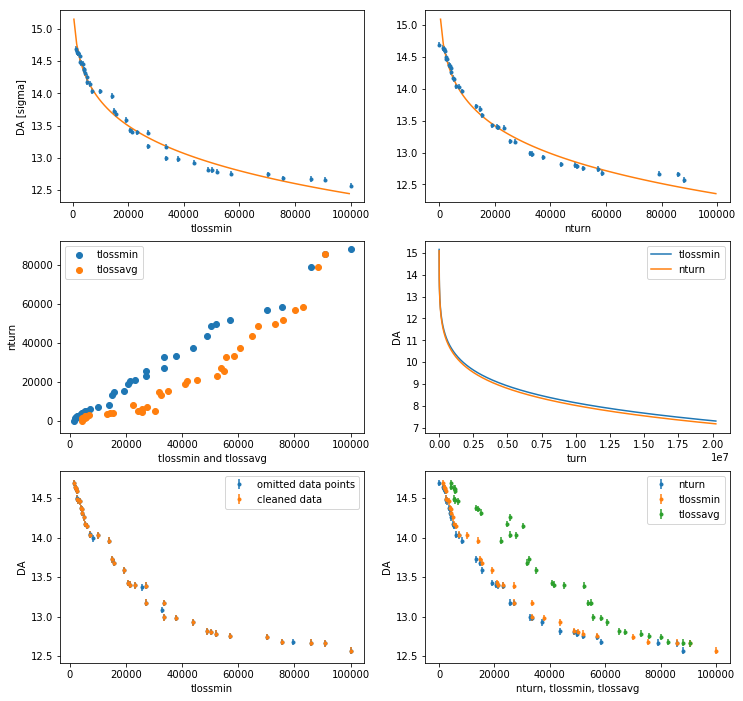

In [338]:
plot_comparison('/home/phermes/development/SixDeskDB/test5_step_2.0sigma.db',1)

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


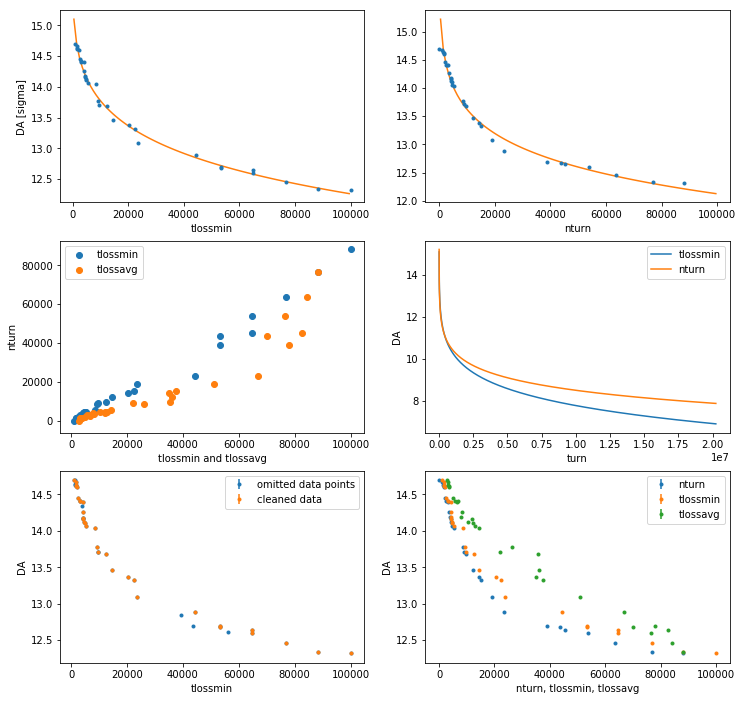

In [339]:
plot_comparison('/home/phermes/development/SixDeskDB/test5_step_0.5sigma.db',1)

In [152]:
def plot_comparison(name,seed):

    fig = plt.figure(figsize=(12,12))
    plt.title("blabla")

    
    ax1 = plt.subplot(321)
    ax2 = plt.subplot(322)
    ax3 = plt.subplot(323)
    ax4 = plt.subplot(324)
    ax5 = plt.subplot(325)
    ax6 = plt.subplot(326)

    b = da.davst(name,emit=2.5)
    b.fit(seed,gradient=0.8)
    exda = b.extrapolate(11245*60*30)

    d,bb,k,_,_,_ = b._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    daval =  da.davst_function(turns,d,bb,k)
    ax1.errorbar(b.cleaned_data['tlossmin'],b.cleaned_data['dawsimp'],yerr=b.cleaned_data['dawsimperr'],fmt='.')
    ax1.plot(turns,daval)
    turns =  np.arange(500,11245*60*30,10000)
    daval =  da.davst_function(turns,d,bb,k)
    ax4.plot(turns,daval, label="tlossmin")

    # plt.show() 

    c = da.davst(name,emit=2.5)
    c.fit(seed,gradient=0.8,xaxis='nturn')
    exda = c.extrapolate(11245*60*30)


    d,bb,k,_,_,_ = c._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    daval =  da.davst_function(turns,d,bb,k)
    ax2.errorbar(c.cleaned_data['nturn'],c.cleaned_data['dawsimp'],yerr=b.cleaned_data['dawsimperr'],fmt='.')
    ax2.plot(turns,daval)
    
    ax3.scatter(b.cleaned_data['tlossmin'], c.cleaned_data['nturn'],label='tlossmin')
    ax3.scatter(b.cleaned_data['tlossavg'], c.cleaned_data['nturn'],label='tlossavg')
    ax3.set_xlabel("tlossmin and tlossavg")
    ax3.set_ylabel("nturn")    
    ax3.legend()
    
    turns =  np.arange(500,11245*60*30, 10000)
    daval =  da.davst_function(turns,d,bb,k)
    ax4.plot(turns,daval, label="nturn")
    
    
    
    f = da.davst(name,emit=2.5)
    f.fit(seed,gradient=0.8,xaxis='tlossavg')
    exda = f.extrapolate(11245*60*30)


    d,bb,k,_,_,_ = f._fit_parameters_dict[seed]
    turns =  np.arange(500,100000, 1000)
    rawdata = f.data[f.data['seed']==seed]
    ax5.errorbar(rawdata['tlossmin'], rawdata['dawsimp'],yerr=rawdata['dawsimperr'], 
                 fmt='.', label='omitted data points')
    ax5.errorbar(f.cleaned_data['tlossmin'],f.cleaned_data['dawsimp'], yerr=f.cleaned_data['dawsimperr'],
                 fmt='.',label='cleaned data')
    ax5.legend()
    ax5.set_xlabel('tlossmin')
    ax5.set_ylabel("DA")
#     ax5.plot(turns,daval)
    
    ax6.errorbar(f.cleaned_data['nturn'], f.cleaned_data['dawsimp'], yerr=f.cleaned_data['dawsimperr'],
                 fmt='.',label='nturn')
    ax6.errorbar(f.cleaned_data['tlossmin'], f.cleaned_data['dawsimp'], yerr=f.cleaned_data['dawsimperr'],
                 fmt='.',label='tlossmin')
    ax6.errorbar(f.cleaned_data['tlossavg'], f.cleaned_data['dawsimp'], yerr=f.cleaned_data['dawsimperr'],
                 fmt='.',label='tlossavg')
    ax6.set_xlabel('nturn, tlossmin, tlossavg')
    ax6.set_ylabel("DA")
    ax6.legend()
    #     turns =  np.arange(500,11245*60*30, 10000)
#     daval =  da.davst_function(turns,d,bb,k)
#     ax4.plot(turns,daval, label="tlossavg")    
    
    
    
    ax1.set_xlabel("tlossmin")
    ax1.set_ylabel("DA [sigma]")
    ax2.set_xlabel("nturn")

    ax4.set_xlabel("turn")
    ax4.set_ylabel("DA")
    ax4.legend()
    

    plt.show()

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


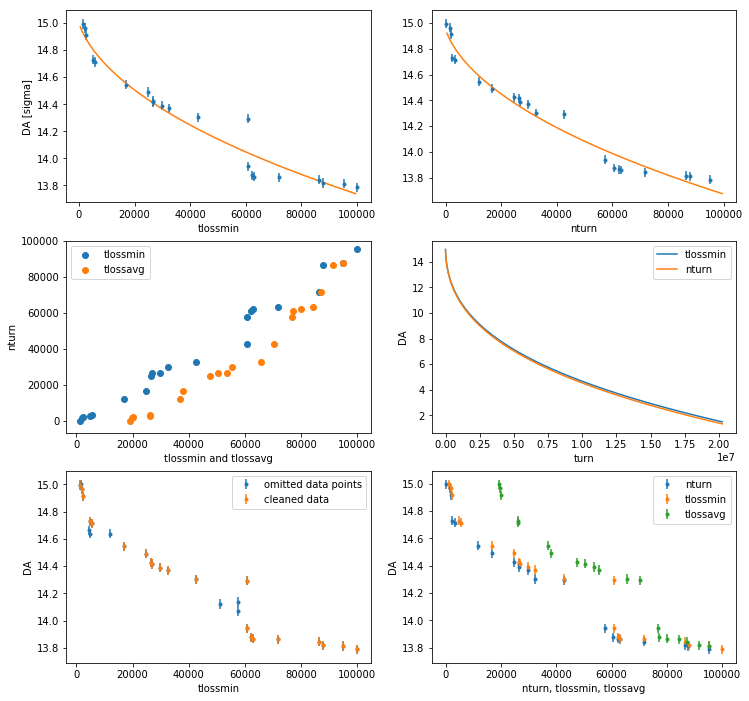

In [154]:
plot_comparison("/home/phermes/development/SixDeskDB/test.db",2)

In [59]:
seed=2
b = da.davst("/home/phermes/development/SixDeskDB/test.db",emit=2.5)
b.fit(seed,gradient=0.8,xaxis='tlossavg')
exda = b.extrapolate(11245*60*30)

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [62]:
dd1 = b.data[b.data['seed']==1]

In [64]:
dd2 = b.clean_data_for_seed(1)

In [65]:
len(dd1),len(dd2)

(35, 28)

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


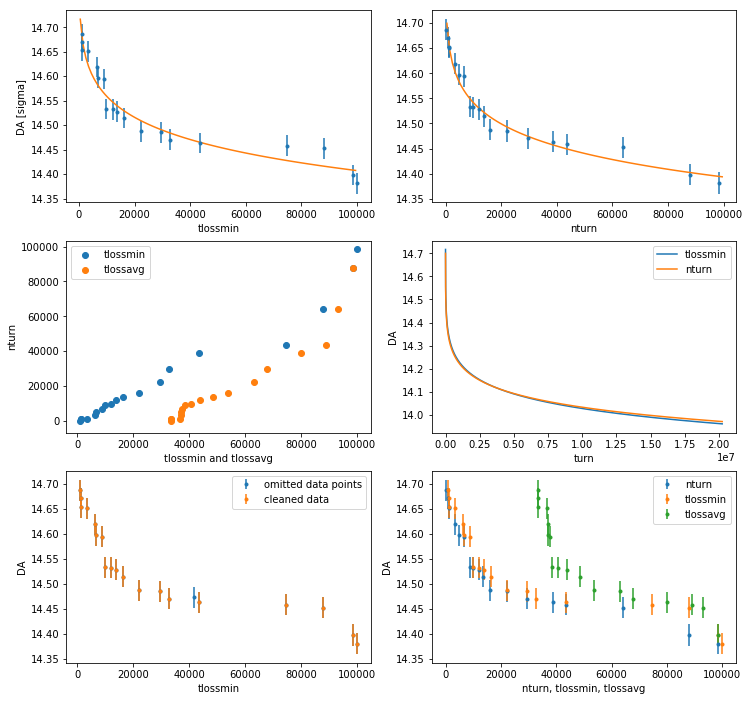

In [160]:
plot_comparison("/home/phermes/development/SixDeskDB/test-0.db",25)

In [20]:
seed=2
b = da.davst("/home/phermes/development/SixDeskDB/test.db",emit=2.5)
b.fit(seed,gradient=0.8,xaxis='tlossavg')
exda = b.extrapolate(11245*60*30)

/home/phermes/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [22]:
 b.fit_parameters

,seed,d,b,kappa,chisq,sigd,sigb
0,2,1.0,1.0,2.0,3191.9639,inf,inf


In [6]:
data = b.data[b.data['seed']==1]

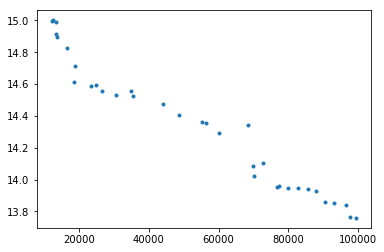

In [9]:
plt.plot(data['tlossavg'], data['dawsimp'],'.')
plt.show()

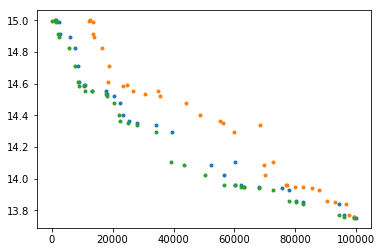

In [12]:
plt.plot(data['tlossmin'], data['dawsimp'],'.')
plt.plot(data['tlossavg'], data['dawsimp'],'.')
plt.plot(data['nturn'], data['dawsimp'],'.')

plt.show()

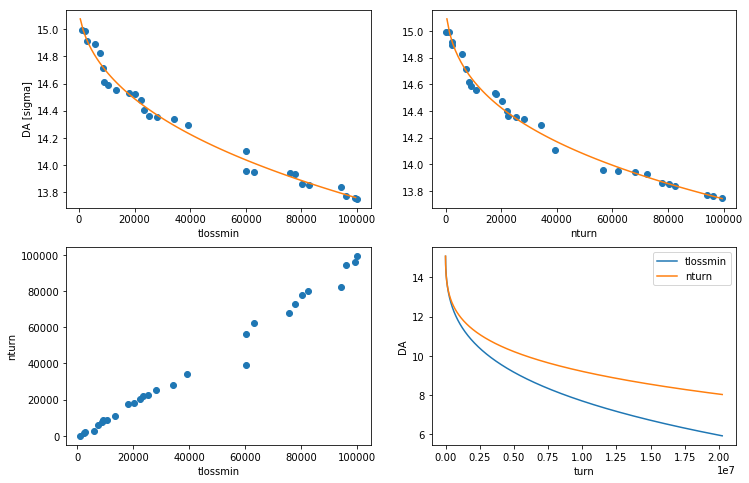

In [7]:
plot_comparison("/home/phermes/development/SixDeskDB/ats2017_b1_QP_0_IOCT_0.db",1)

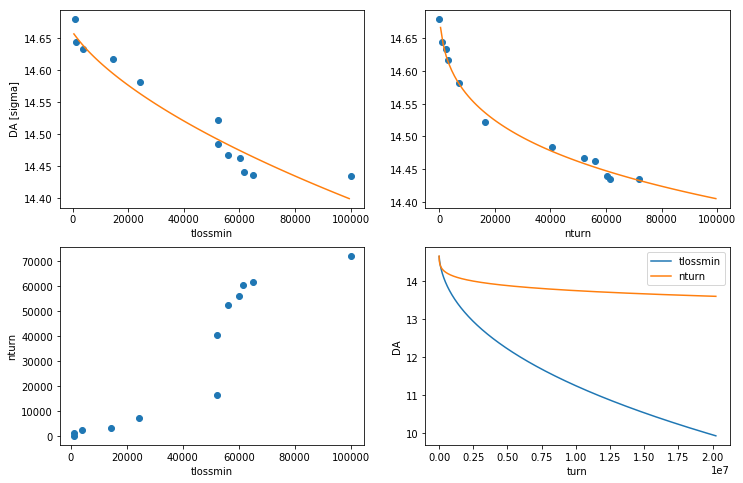

In [8]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",25)

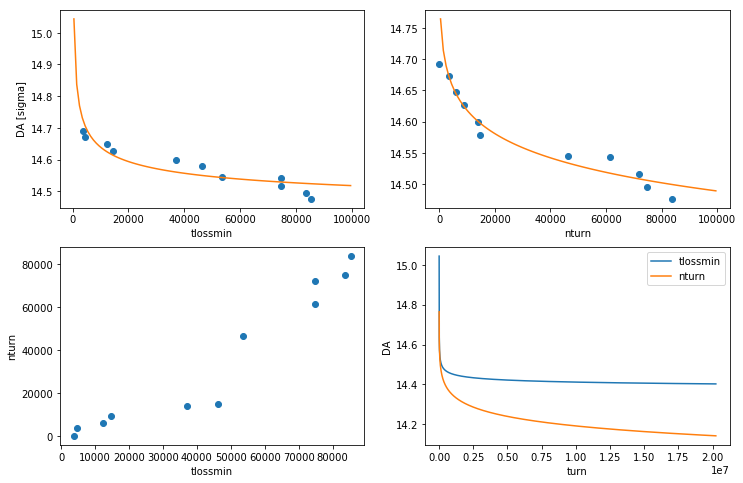

In [9]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-0.0-0.0.db",8)

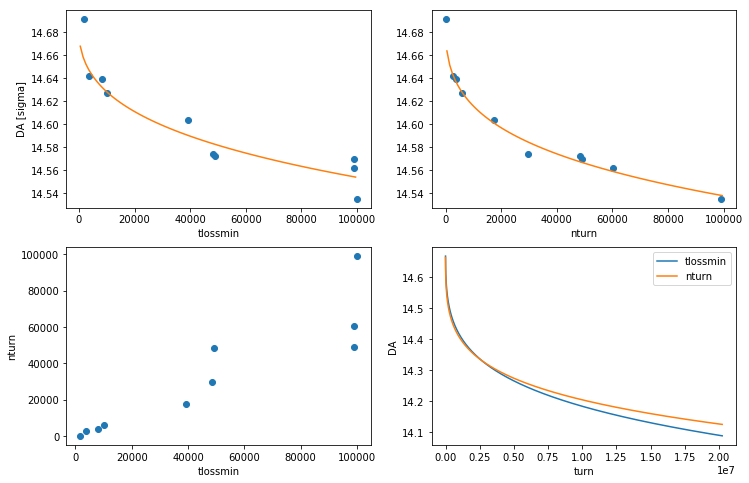

In [10]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",2)

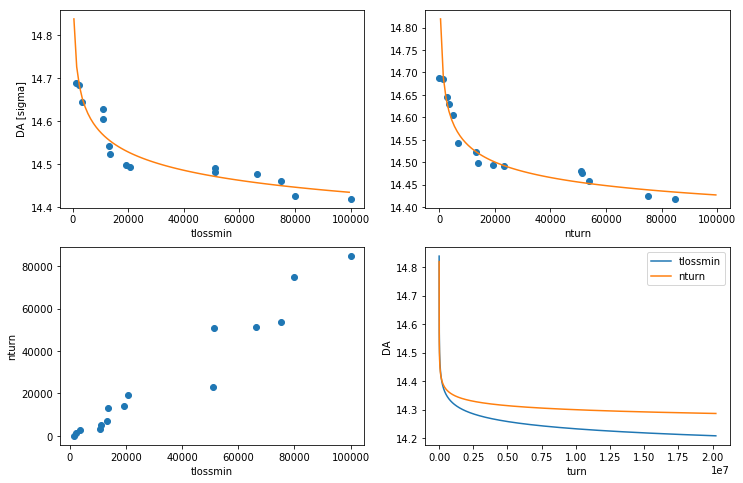

In [11]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",1)

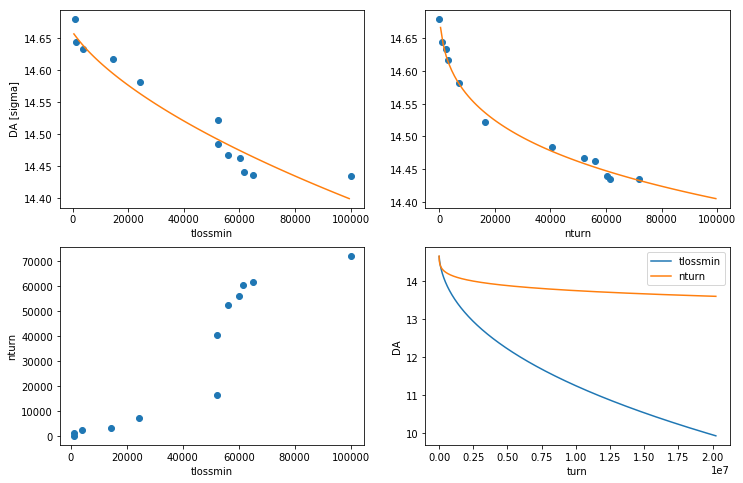

In [12]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db",25)

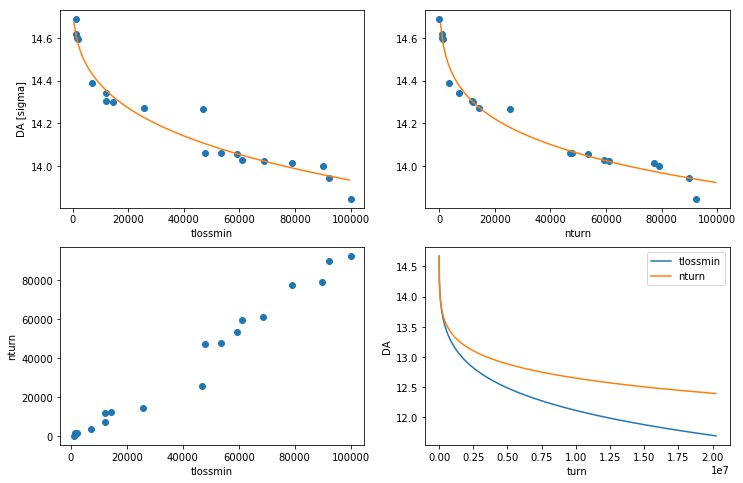

In [13]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-0.0.db",5)

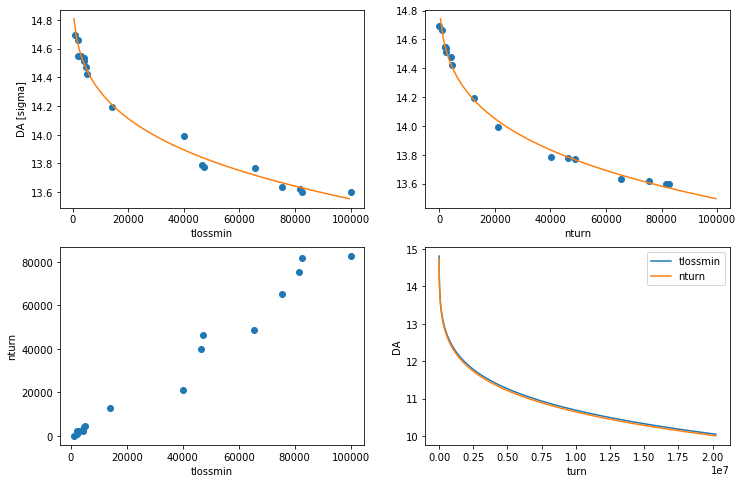

In [14]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-0.0.db",10)

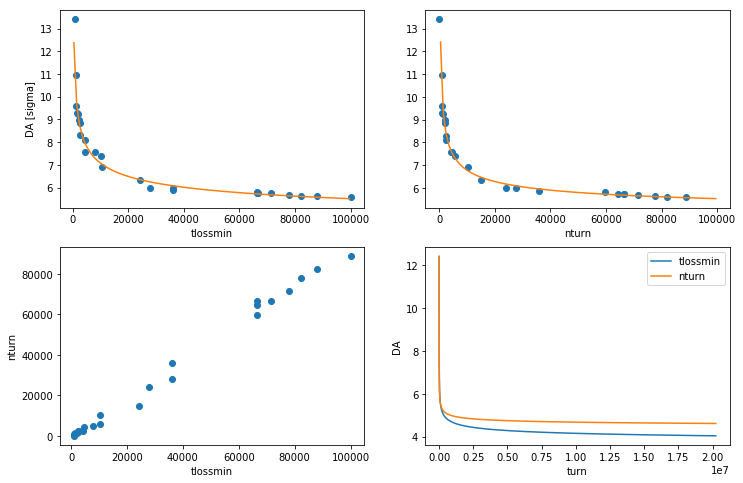

In [15]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db",13)

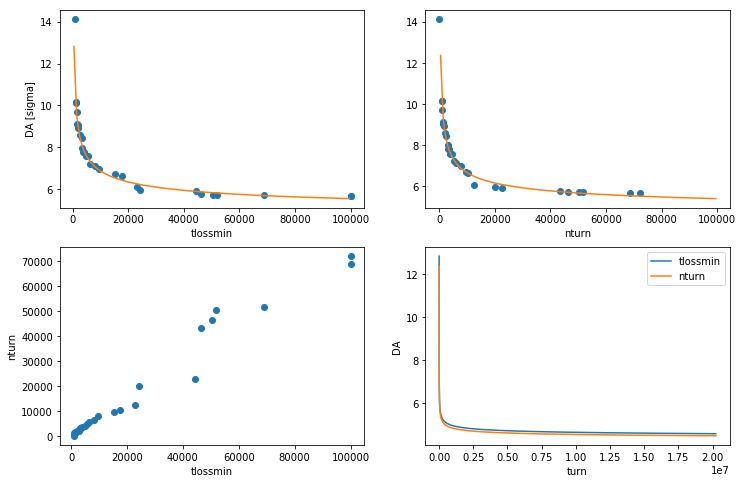

In [16]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db",1)

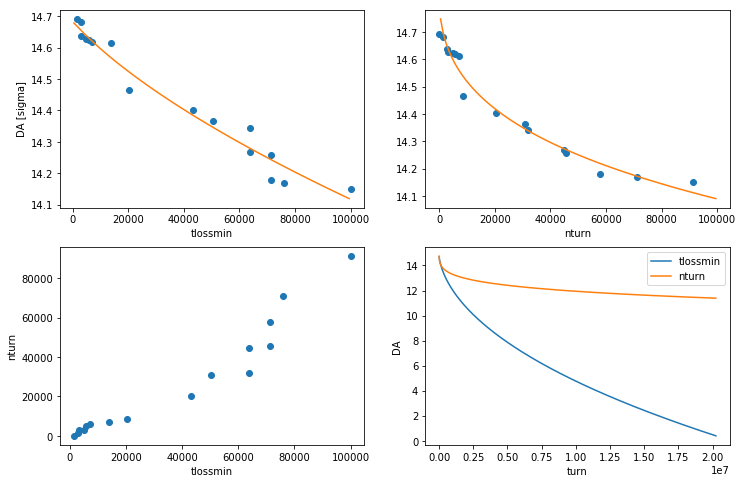

In [44]:
plot_comparison("/home/phermes/development/SixDeskDB/chrom-6.0-4.0.db",43)

In [17]:
seed=25
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-2.0-0.0.db',emit=2.5)
b.fit(seeds,gradient=0.8)
exda = b.extrapolate(11245*60*30)

plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

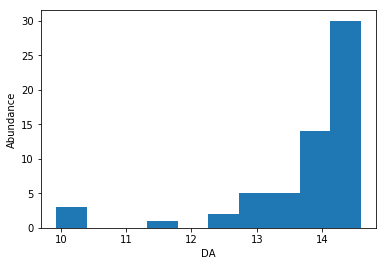

In [20]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

In [21]:
seed=25
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-6.0-12.0.db',emit=2.5)
b.fit(seeds,gradient=0.8)
exda = b.extrapolate(11245*60*30)

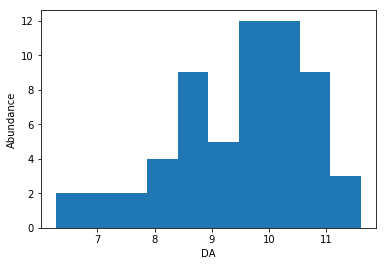

In [22]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

In [27]:
seed=25
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-6.0-12.0.db',emit=2.5)
b.fit(seeds,gradient=0.8,xaxis='nturn')
exda = b.extrapolate(11245*60*30)

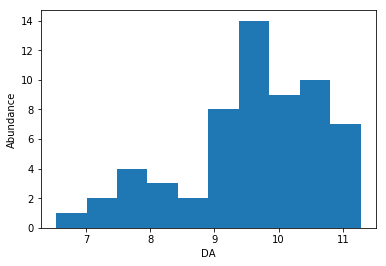

In [28]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

## Extrapolated DA at 30min with tlossmin

In [23]:
seed=25
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db',emit=2.5)
b.fit(seeds,gradient=0.8)
exda = b.extrapolate(11245*60*30)

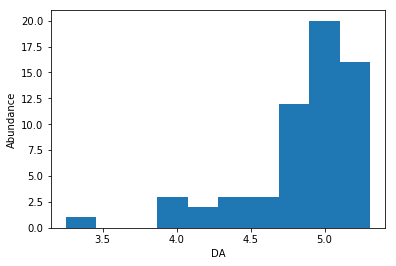

In [24]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

## Extrapolated DA at 30min with nturn

In [25]:
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-20.0-40.0.db',emit=2.5)
b.fit(seeds,gradient=0.8,xaxis='nturn')
exda = b.extrapolate(11245*60*30)

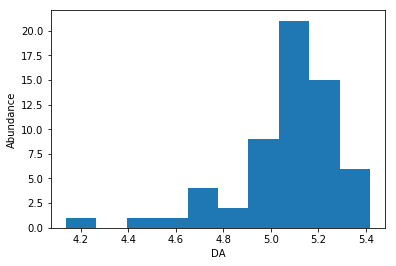

In [26]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

In [31]:
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-10.0-20.0.db',emit=2.5)
b.fit(seeds,gradient=0.8)
exda = b.extrapolate(11245*60*30)

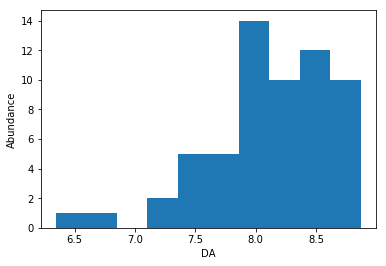

In [32]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()

In [29]:
seeds = np.arange(1,61).tolist()

b = da.davst('/home/phermes/development/SixDeskDB/chrom-10.0-20.0.db',emit=2.5)
b.fit(seeds,gradient=0.8,xaxis='nturn')
exda = b.extrapolate(11245*60*30)

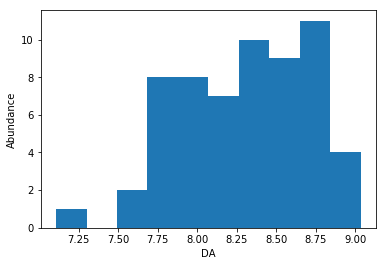

In [30]:
plt.hist(exda['ext_da'])
plt.xlabel("DA")
plt.ylabel("Abundance")
plt.show()